In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
  
df = pd.read_csv('arima_data.csv', index_col ='Date/Time', parse_dates = ['Date/Time']) 

# Handle missing values by forward fill
df['Temp_C'].fillna(method='ffill', inplace=True)

print(df.head()) 


                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-12-16 00:00:00   -10.0             -14.9         67               24   
2012-12-16 01:00:00   -10.1             -14.8         68               24   
2012-12-16 02:00:00   -10.1             -14.6         70               28   
2012-12-16 03:00:00   -10.1             -14.5         70               28   
2012-12-16 04:00:00   -10.1             -14.5         70               24   

                     Visibility_km  Press_kPa Weather  
Date/Time                                              
2012-12-16 00:00:00           25.0     102.31  Cloudy  
2012-12-16 01:00:00           25.0     102.27  Cloudy  
2012-12-16 02:00:00           25.0     102.17  Cloudy  
2012-12-16 03:00:00           25.0     102.15  Cloudy  
2012-12-16 04:00:00           25.0     102.08  Cloudy  


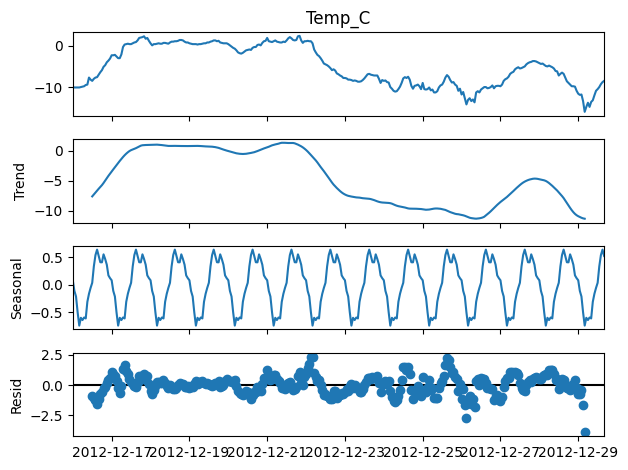

In [37]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is DataFrame containing the time series data
result = seasonal_decompose(df['Temp_C'], model='additive')

# Plotting the decomposed components
result.plot()
plt.show()


In [38]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df['Temp_C'])

# Extract and print results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret results
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.8840844468219082
p-value: 0.3395849298696808
Critical Values:
   1%: -3.450951662384033
   5%: -2.8706147570800784
   10%: -2.571604931640625
The series is not stationary.


In [39]:
if adf_result[1] > 0.05:
    # Compute first-order difference
    df['diff_meantemp'] = df['Temp_C'].diff()
    
    # Drop the first NaN value resulting from differencing
    df.dropna(inplace=True)
    
    # Check the stationarity of the differenced series
    adf_result_diff = adfuller(df['diff_meantemp'])
    
    # Print ADF test results for the differenced series
    print('\nAfter differencing:')
    print('ADF Statistic:', adf_result_diff[0])
    print('p-value:', adf_result_diff[1])
    print('Critical Values:')
    for key, value in adf_result_diff[4].items():
        print(f'   {key}: {value}')

    # Interpret ADF test results for the differenced series
    if adf_result_diff[1] <= 0.05:
        print("The differenced series is stationary.")
    else:
        print("The differenced series is still not stationary.")


After differencing:
ADF Statistic: -4.912706623200348
p-value: 3.2941718732252874e-05
Critical Values:
   1%: -3.450951662384033
   5%: -2.8706147570800784
   10%: -2.571604931640625
The differenced series is stationary.


In [40]:
from pmdarima import auto_arima
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function
stepwise_fit = auto_arima(df['Temp_C'], m=12, seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True)

stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=718.776, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=628.385, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=701.280, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=594.496, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=610.003, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=591.642, Time=0.66 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=625.438, Time=0.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.45 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=589.615, Time=0.77 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=623.494, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  328
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -284.484
Date:                            Tue, 30 Apr 2024   AIC                            584.967
Time:                                    01:38:36   BIC                            614.988
Sample:                                12-16-2012   HQIC                           596.962
                                     - 12-29-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1816      0.038      4.743      0.000       0.107       0.257
ar.L2          0.0783      0.041      1.929      0.054      -0.001       0.158
ar.L3          0.0831      0.049      1.686      0.092      -0.013       0.180
ar.L4          0.0971      0.046      2.093      0.036       0.006       0.188
ar.L5          0.1207      0.047      2.592      0.010       0.029       0.212
ar.S.L12      -0.6553      0.050    -13.035      0.000      -0.754      -0.557
ar.S.L24      -0.3729      0.057     -6.488      0.000      -0.486      -0.260
sigma2         0.3488      0.020     17.124      0.000       0.309       0.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                56.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
total_length = len(df)

# Calculate the index to split the data
split_index = int(0.8 * total_length)

train = df.iloc[:split_index] 
test = df.iloc[split_index:]
  
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Temp_C'],  
                order = (5,1,0),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Temp_C   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -215.579
Date:                            Tue, 30 Apr 2024   AIC                            447.157
Time:                                    01:41:04   BIC                            475.297
Sample:                                12-16-2012   HQIC                           458.484
                                     - 12-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1549      0.048      3.209      0.001       0.060       0.250
ar.L2          0.0795      0.046      1.743      0.081      -0.010       0.169
ar.L3          0.0085      0.055      0.156      0.876      -0.099       0.116
ar.L4          0.0886      0.054      1.636      0.102      -0.018       0.195
ar.L5          0.0917      0.054      1.688      0.091      -0.015       0.198
ar.S.L12      -0.7005      0.057    -12.288      0.000      -0.812      -0.589
ar.S.L24      -0.3991      0.072     -5.548      0.000      -0.540      -0.258
sigma2         0.3207      0.021     15.451      0.000       0.280       0.361
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                56.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.77   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

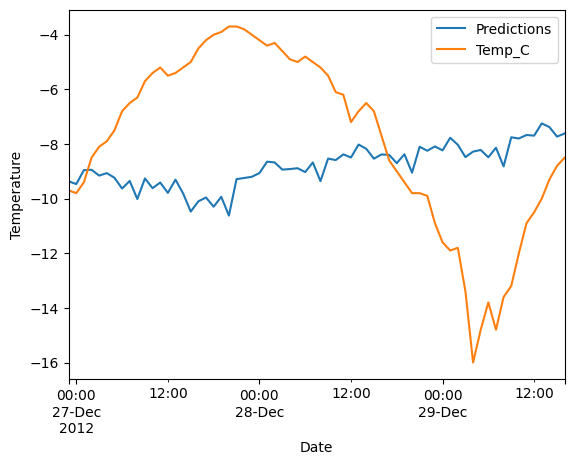

In [47]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Temp_C'].plot(legend = True) 
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.show()


In [48]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
rmse(test["Temp_C"], predictions) 

3.8807106043734874

<Axes: xlabel='Date/Time'>

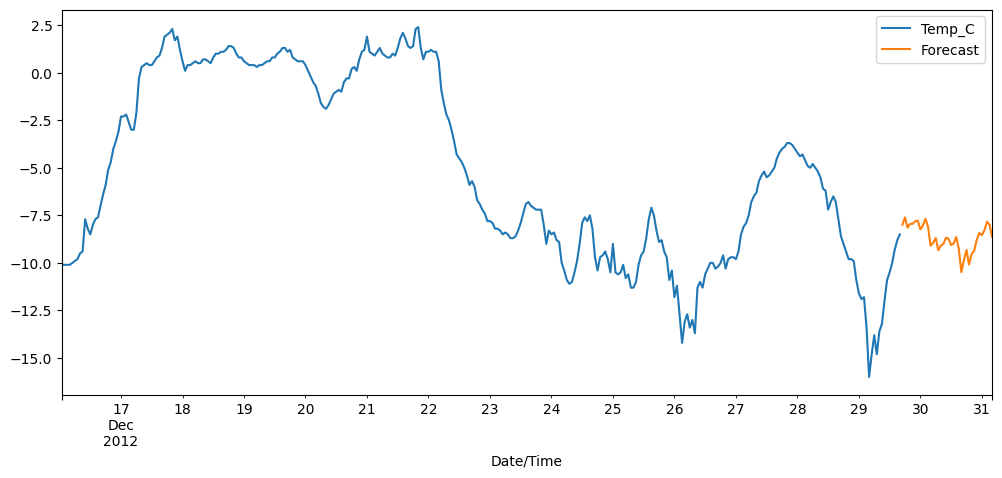

In [49]:
model = model = SARIMAX(df['Temp_C'],  
                        order = (2, 0, 0),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['Temp_C'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 